In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('new_data.csv')

In [3]:
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Season
0,1.0,Fri,2017-08-11,19:45,Arsenal,2.5,4–3,1.5,Leicester City,59387.0,Emirates Stadium,Mike Dean,2017-2018
1,1.0,Sat,2017-08-12,12:30,Watford,2.1,3–3,2.6,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor,2017-2018
2,1.0,Sat,2017-08-12,15:00,Crystal Palace,1.1,0–3,1.5,Huddersfield,25448.0,Selhurst Park,Jonathan Moss,2017-2018
3,1.0,Sat,2017-08-12,15:00,West Brom,1.3,1–0,0.5,Bournemouth,25011.0,The Hawthorns,Robert Madley,2017-2018
4,1.0,Sat,2017-08-12,15:00,Chelsea,1.5,2–3,0.6,Burnley,41616.0,Stamford Bridge,Craig Pawson,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,38.0,Sun,2025-05-25,16:00,Fulham,NaN,NaN,NaN,Manchester City,NaN,Craven Cottage,NaN,2024-2025
3036,38.0,Sun,2025-05-25,16:00,Nott'ham Forest,NaN,NaN,NaN,Chelsea,NaN,The City Ground,NaN,2024-2025
3037,38.0,Sun,2025-05-25,16:00,Manchester Utd,NaN,NaN,NaN,Aston Villa,NaN,Old Trafford,NaN,2024-2025
3038,38.0,Sun,2025-05-25,16:00,Wolves,NaN,NaN,NaN,Brentford,NaN,Molineux Stadium,NaN,2024-2025


In [4]:
# print null values
df.isnull().sum()

Wk              0
Day             0
Date            0
Time            0
Home            0
xG            290
Score         290
xG.1          290
Away            0
Attendance    736
Venue           0
Referee       290
Season          0
dtype: int64

In [5]:
# create a variable called current day
current_day = pd.to_datetime('today').date()

# convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date

# create a new df filter out the rows where the date is greater than the current day
model_df = df[df['Date'] < current_day]

In [6]:
model_df.isnull().sum()

Wk              0
Day             0
Date            0
Time            0
Home            0
xG              0
Score           0
xG.1            0
Away            0
Attendance    446
Venue           0
Referee         0
Season          0
dtype: int64

In [7]:
model_df[model_df.isnull().any(axis=1)]

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Season
1048,28.0,Wed,2020-06-17,18:00,Aston Villa,1.4,0–0,0.3,Sheffield Utd,NaN,Villa Park,Michael Oliver,2019-2020
1049,28.0,Wed,2020-06-17,20:15,Manchester City,2.6,3–0,0.3,Arsenal,NaN,Etihad Stadium,Anthony Taylor,2019-2020
1050,30.0,Fri,2020-06-19,18:00,Norwich City,0.6,0–3,1.7,Southampton,NaN,Carrow Road,Kevin Friend,2019-2020
1051,30.0,Fri,2020-06-19,20:15,Tottenham,0.4,1–1,1.7,Manchester Utd,NaN,Tottenham Hotspur Stadium,Jonathan Moss,2019-2020
1052,30.0,Sat,2020-06-20,12:30,Watford,1.3,1–1,1.0,Leicester City,NaN,Vicarage Road Stadium,Craig Pawson,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,9.0,Sat,2024-10-26,15:00,Manchester City,2.9,1–0,0.2,Southampton,NaN,Etihad Stadium,Tony Harrington,2024-2025
2744,9.0,Sat,2024-10-26,15:00,Aston Villa,1.8,1–1,0.3,Bournemouth,NaN,Villa Park,Chris Kavanagh,2024-2025
2746,9.0,Sun,2024-10-27,14:00,Chelsea,1.6,2–1,1.8,Newcastle Utd,NaN,Stamford Bridge,Simon Hooper,2024-2025
2747,9.0,Sun,2024-10-27,14:00,West Ham,2.8,2–1,2.3,Manchester Utd,NaN,London Stadium,David Coote,2024-2025


In [8]:
model_df['Attendance'] = model_df['Attendance'].fillna(0) # setting null values to 0 because the NaN are from Covid-19 games with no attendance

model_df['Attendance'] = model_df['Attendance'].astype(int)

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/3374579801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Attendance'] = model_df['Attendance'].fillna(0) # setting null values to 0 because the NaN are from Covid-19 games with no attendance
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/3374579801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Attendance'] = model_df['Attendance'].astype(int)


In [9]:
model_df[['home_goals', 'away_goals']] = model_df['Score'].str.split('–', expand=True).astype(int)

# rename xG and xG.1 columns to home_xG and away_xG
model_df.rename(columns={'xG': 'home_xg', 'xG.1': 'away_xg'}, inplace=True)

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/838135310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['home_goals', 'away_goals']] = model_df['Score'].str.split('–', expand=True).astype(int)
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/838135310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['home_goals', 'away_goals']] = model_df['Score'].str.split('–', expand=True).astype(int)
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_4

In [10]:
def get_result(row):
    if row['home_goals'] > row['away_goals']:
        return 'Home Win'
    elif row['home_goals'] < row['away_goals']:
        return 'Away Win'
    else:
        return 'Draw'
    
model_df['Result'] = model_df.apply(get_result, axis=1)

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/2600445915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Result'] = model_df.apply(get_result, axis=1)


In [11]:
model_df

,Wk,Day,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,Referee,Season,home_goals,away_goals,Result
0,1.0,Fri,2017-08-11,19:45,Arsenal,2.5,4–3,1.5,Leicester City,59387,Emirates Stadium,Mike Dean,2017-2018,4,3,Home Win
1,1.0,Sat,2017-08-12,12:30,Watford,2.1,3–3,2.6,Liverpool,20407,Vicarage Road Stadium,Anthony Taylor,2017-2018,3,3,Draw
2,1.0,Sat,2017-08-12,15:00,Crystal Palace,1.1,0–3,1.5,Huddersfield,25448,Selhurst Park,Jonathan Moss,2017-2018,0,3,Away Win
3,1.0,Sat,2017-08-12,15:00,West Brom,1.3,1–0,0.5,Bournemouth,25011,The Hawthorns,Robert Madley,2017-2018,1,0,Home Win
4,1.0,Sat,2017-08-12,15:00,Chelsea,1.5,2–3,0.6,Burnley,41616,Stamford Bridge,Craig Pawson,2017-2018,2,3,Away Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,9.0,Sat,2024-10-26,17:30,Everton,0.8,1–1,1.2,Fulham,38742,Goodison Park,John Brooks,2024-2025,1,1,Draw
2746,9.0,Sun,2024-10-27,14:00,Chelsea,1.6,2–1,1.8,Newcastle Utd,0,Stamford Bridge,Simon Hooper,2024-2025,2,1,Home Win
2747,9.0,Sun,2024-10-27,14:00,West Ham,2.8,2–1,2.3,Manchester Utd,0,London Stadium,David Coote,2024-2025,2,1,Home Win
2748,9.0,Sun,2024-10-27,14:00,Crystal Palace,0.8,1–0,0.7,Tottenham,0,Selhurst Park,Darren Bond,2024-2025,1,0,Home Win


In [12]:
model_df['Day'] = pd.to_datetime(model_df['Date']).dt.day_name()

model_df['Season'] = model_df['Season'].apply(lambda x: x.split('-')[1])

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/1618590677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Day'] = pd.to_datetime(model_df['Date']).dt.day_name()
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_43586/1618590677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Season'] = model_df['Season'].apply(lambda x: x.split('-')[1])


In [13]:
model_df

,Wk,Day,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,Referee,Season,home_goals,away_goals,Result
0,1.0,Friday,2017-08-11,19:45,Arsenal,2.5,4–3,1.5,Leicester City,59387,Emirates Stadium,Mike Dean,2018,4,3,Home Win
1,1.0,Saturday,2017-08-12,12:30,Watford,2.1,3–3,2.6,Liverpool,20407,Vicarage Road Stadium,Anthony Taylor,2018,3,3,Draw
2,1.0,Saturday,2017-08-12,15:00,Crystal Palace,1.1,0–3,1.5,Huddersfield,25448,Selhurst Park,Jonathan Moss,2018,0,3,Away Win
3,1.0,Saturday,2017-08-12,15:00,West Brom,1.3,1–0,0.5,Bournemouth,25011,The Hawthorns,Robert Madley,2018,1,0,Home Win
4,1.0,Saturday,2017-08-12,15:00,Chelsea,1.5,2–3,0.6,Burnley,41616,Stamford Bridge,Craig Pawson,2018,2,3,Away Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,9.0,Saturday,2024-10-26,17:30,Everton,0.8,1–1,1.2,Fulham,38742,Goodison Park,John Brooks,2025,1,1,Draw
2746,9.0,Sunday,2024-10-27,14:00,Chelsea,1.6,2–1,1.8,Newcastle Utd,0,Stamford Bridge,Simon Hooper,2025,2,1,Home Win
2747,9.0,Sunday,2024-10-27,14:00,West Ham,2.8,2–1,2.3,Manchester Utd,0,London Stadium,David Coote,2025,2,1,Home Win
2748,9.0,Sunday,2024-10-27,14:00,Crystal Palace,0.8,1–0,0.7,Tottenham,0,Selhurst Park,Darren Bond,2025,1,0,Home Win


In [14]:
model_df = pd.get_dummies(model_df, columns=['Day'])

In [15]:
model_df.reset_index(drop=True, inplace=True)

In [16]:
for x in model_df.Home.unique():
    temp_df = model_df[(model_df['Home'] == x) | (model_df['Away'] == x)]
    temp_df = temp_df.sort_values(['Date'])

    temp_df['goal_value_to_calculate'] = temp_df.apply(lambda y: y['home_goals'] if y['Home'] == x else y['away_goals'], axis=1)
    temp_df['rolling_avg_goals'] = temp_df['goal_value_to_calculate'].rolling(window = 5, closed = 'left', min_periods = 1).mean()

    for index, row in temp_df.iterrows():
        if row['Home'] == x:
            model_df.at[index, 'home_rolling_avg_goals'] = row['rolling_avg_goals']
        else:
            model_df.at[index, 'away_rolling_avg_goals'] = row['rolling_avg_goals']

In [17]:
for x in model_df.Home.unique():
    temp_df = model_df[(model_df['Home'] == x) | (model_df['Away'] == x)]
    temp_df = temp_df.sort_values(['Date'])

    temp_df['xg_value_to_calculate'] = temp_df.apply(lambda y: y['home_xg'] if y['Home'] == x else y['away_xg'], axis=1)
    temp_df['rolling_avg_xG'] = temp_df['xg_value_to_calculate'].rolling(window = 5, closed = 'left', min_periods = 1).mean()

    for index, row in temp_df.iterrows():
        if row['Home'] == x:
            model_df.at[index, 'home_rolling_avg_xG'] = row['rolling_avg_xG']
        else:
            model_df.at[index, 'away_rolling_avg_xG'] = row['rolling_avg_xG']

In [18]:
model_df = model_df.dropna(subset=['home_rolling_avg_goals', 'away_rolling_avg_goals', 'home_rolling_avg_xG', 'away_rolling_avg_xG'])

In [19]:
model_df

,Wk,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,home_rolling_avg_goals,away_rolling_avg_goals,home_rolling_avg_xG,away_rolling_avg_xG
10,2.0,2017-08-19,12:30,Swansea City,0.4,0–4,3.0,Manchester Utd,20862,Liberty Stadium,...,False,True,False,False,False,False,0.0,4.0,0.30,2.10
11,2.0,2017-08-19,15:00,Bournemouth,1.0,0–2,2.4,Watford,10501,Vitality Stadium,...,False,True,False,False,False,False,0.0,3.0,0.50,2.10
12,2.0,2017-08-19,15:00,Southampton,2.1,3–2,2.0,West Ham,31424,St. Mary's Stadium,...,False,True,False,False,False,False,0.0,0.0,2.00,0.50
13,2.0,2017-08-19,15:00,Leicester City,2.0,2–0,0.2,Brighton,31902,King Power Stadium,...,False,True,False,False,False,False,3.0,0.0,1.50,0.30
14,2.0,2017-08-19,15:00,Burnley,1.3,0–1,0.9,West Brom,19619,Turf Moor,...,False,True,False,False,False,False,3.0,1.0,0.60,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,9.0,2024-10-26,17:30,Everton,0.8,1–1,1.2,Fulham,38742,Goodison Park,...,False,True,False,False,False,False,1.4,1.6,1.06,1.88
2746,9.0,2024-10-27,14:00,Chelsea,1.6,2–1,1.8,Newcastle Utd,0,Stamford Bridge,...,False,False,True,False,False,False,2.0,0.8,2.10,1.74
2747,9.0,2024-10-27,14:00,West Ham,2.8,2–1,2.3,Manchester Utd,0,London Stadium,...,False,False,True,False,False,False,1.4,1.0,1.42,1.42
2748,9.0,2024-10-27,14:00,Crystal Palace,0.8,1–0,0.7,Tottenham,0,Selhurst Park,...,False,False,True,False,False,False,0.6,2.4,1.20,2.36


In [20]:
# create a new column for the central moving average of the home goals
model_df['home_goals_cma'] = model_df['home_goals'].expanding().mean()
model_df['home_xg_cma'] = model_df['home_xg'].expanding().mean()

# away goals
model_df['away_goals_cma'] = model_df['away_goals'].expanding().mean()
model_df['away_xg_cma'] = model_df['away_xg'].expanding().mean()

# create a new column by dividing the home goals by central moving average
model_df['home_goals_div_cma'] = model_df['home_goals'] / model_df['home_goals_cma']
model_df['home_xg_div_cma'] = model_df['home_xg'] / model_df['home_xg_cma']

# away goals
model_df['away_goals_div_cma'] = model_df['away_goals'] / model_df['away_goals_cma']
model_df['away_xg_div_cma'] = model_df['away_xg'] / model_df['away_xg_cma']

In [21]:
# set Wk column to integer
model_df['Wk'] = model_df['Wk'].astype(int)

# create a new column called quarter. divide the season into 4 quarters using the Wk column and assign a value between 1 and 4
model_df['quarter'] = np.where(model_df['Wk'].astype(int) <= 9, 1,
                np.where(model_df['Wk'].astype(int) <= 18, 2,
                np.where(model_df['Wk'].astype(int) <= 27, 3, 4)))

# using home_goals_div_cma, take the mean of the column for each quarter. put into new column called home_goals_seasonality
model_df['home_goals_seasonality'] = model_df.groupby('quarter')['home_goals_div_cma'].transform('mean')
model_df['home_xg_seasonality'] = model_df.groupby('quarter')['home_xg_div_cma'].transform('mean')

# away goals
model_df['away_goals_seasonality'] = model_df.groupby('quarter')['away_goals_div_cma'].transform('mean')
model_df['away_xg_seasonality'] = model_df.groupby('quarter')['away_xg_div_cma'].transform('mean')

# create a new column called home_goals_deseasonalised by dividing home_goals by home_goals_seasonality
model_df['home_goals_deseasonalised'] = model_df['home_goals'] / model_df['home_goals_seasonality']
model_df['home_xg_deseasonalised'] = model_df['home_xg'] / model_df['home_xg_seasonality']

# away goals
model_df['away_goals_deseasonalised'] = model_df['away_goals'] / model_df['away_goals_seasonality']
model_df['away_xg_deseasonalised'] = model_df['away_xg'] / model_df['away_xg_seasonality']

In [22]:
display(model_df)

,Wk,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,...,away_xg_div_cma,quarter,home_goals_seasonality,home_xg_seasonality,away_goals_seasonality,away_xg_seasonality,home_goals_deseasonalised,home_xg_deseasonalised,away_goals_deseasonalised,away_xg_deseasonalised
10,2,2017-08-19,12:30,Swansea City,0.4,0–4,3.0,Manchester Utd,20862,Liberty Stadium,...,1.000000,1,1.033026,1.031838,1.078166,1.065378,0.000000,0.387658,3.710005,2.815902
11,2,2017-08-19,15:00,Bournemouth,1.0,0–2,2.4,Watford,10501,Vitality Stadium,...,0.888889,1,1.033026,1.031838,1.078166,1.065378,0.000000,0.969145,1.855002,2.252722
12,2,2017-08-19,15:00,Southampton,2.1,3–2,2.0,West Ham,31424,St. Mary's Stadium,...,0.810811,1,1.033026,1.031838,1.078166,1.065378,2.904089,2.035204,1.855002,1.877268
13,2,2017-08-19,15:00,Leicester City,2.0,2–0,0.2,Brighton,31902,King Power Stadium,...,0.105263,1,1.033026,1.031838,1.078166,1.065378,1.936060,1.938289,0.000000,0.187727
14,2,2017-08-19,15:00,Burnley,1.3,0–1,0.9,West Brom,19619,Turf Moor,...,0.529412,1,1.033026,1.031838,1.078166,1.065378,0.000000,1.259888,0.927501,0.844771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,9,2024-10-26,17:30,Everton,0.8,1–1,1.2,Fulham,38742,Goodison Park,...,0.975857,1,1.033026,1.031838,1.078166,1.065378,0.968030,0.775316,0.927501,1.126361
2746,9,2024-10-27,14:00,Chelsea,1.6,2–1,1.8,Newcastle Utd,0,Stamford Bridge,...,1.463537,1,1.033026,1.031838,1.078166,1.065378,1.936060,1.550631,0.927501,1.689541
2747,9,2024-10-27,14:00,West Ham,2.8,2–1,2.3,Manchester Utd,0,London Stadium,...,1.869478,1,1.033026,1.031838,1.078166,1.065378,1.936060,2.713605,0.927501,2.158858
2748,9,2024-10-27,14:00,Crystal Palace,0.8,1–0,0.7,Tottenham,0,Selhurst Park,...,0.569062,1,1.033026,1.031838,1.078166,1.065378,0.968030,0.775316,0.000000,0.657044


In [23]:
model_df['Season'] = model_df['Season'].astype(int)
# set home goals and away goals to integer
model_df['home_goals'] = model_df['home_goals'].astype(int)
model_df['away_goals'] = model_df['away_goals'].astype(int)

In [24]:
# Ensure 'Result' is categorical or integer-based
model_df['Result'] = model_df['Result'].astype('category')  # or use int depending on your encoding

# Ensure 'home_goals' and 'away_goals' are integers
model_df['home_goals'] = pd.to_numeric(model_df['home_goals'], errors='coerce').fillna(0).astype(int)
model_df['away_goals'] = pd.to_numeric(model_df['away_goals'], errors='coerce').fillna(0).astype(int)


In [25]:
# import packages for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
model_df.columns

Index(['Wk', 'Date', 'Time', 'Home', 'home_xg', 'Score', 'away_xg', 'Away',
       'Attendance', 'Venue', 'Referee', 'Season', 'home_goals', 'away_goals',
       'Result', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'home_rolling_avg_goals', 'away_rolling_avg_goals',
       'home_rolling_avg_xG', 'away_rolling_avg_xG', 'home_goals_cma',
       'home_xg_cma', 'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma',
       'home_xg_div_cma', 'away_goals_div_cma', 'away_xg_div_cma', 'quarter',
       'home_goals_seasonality', 'home_xg_seasonality',
       'away_goals_seasonality', 'away_xg_seasonality',
       'home_goals_deseasonalised', 'home_xg_deseasonalised',
       'away_goals_deseasonalised', 'away_xg_deseasonalised'],
      dtype='object')

In [27]:
features = [column for column in model_df.drop(columns=[
    'Date', 'Time', 'Referee', 'home_xg', 'away_xg','Home', 'Away', 'home_goals', 
    'away_goals', 'Result', 'Season', 'quarter', 'home_goals_cma', 'home_xg_cma', 'Venue',
    'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma', 'home_xg_div_cma', 'Score',
    'away_goals_div_cma', 'away_xg_div_cma', 'home_goals_seasonality', 'home_xg_seasonality', 
    'away_goals_seasonality', 'away_xg_seasonality', 'home_goals_deseasonalised', 
    'home_xg_deseasonalised', 'away_goals_deseasonalised', 'away_xg_deseasonalised'])]

In [28]:
features

['Wk',
 'Attendance',
 'Day_Friday',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'home_rolling_avg_goals',
 'away_rolling_avg_goals',
 'home_rolling_avg_xG',
 'away_rolling_avg_xG']

In [29]:
# features = df.drop(columns = [columns]).columns

In [30]:
train_data = model_df[model_df['Season'] <= 2022]
test_data = model_df[model_df['Season'] == 2023]

X_train = train_data[features]
y_train = train_data['Result']

X_test = test_data[features]
y_test = test_data['Result']

In [31]:
X_train.shape

(1882, 13)

In [32]:
clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [33]:
predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

48.81% accuracy


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10 , 15, 20]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 200]})

In [35]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=69)

In [36]:
clf = RandomForestClassifier(random_state=69, max_depth=5, n_estimators=50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

52.77% accuracy


In [37]:
model_df = pd.get_dummies(model_df, columns=['Home', 'Away', 'Venue']) # removed Referee
model_df.head()

,Wk,Date,Time,home_xg,Score,away_xg,Attendance,Referee,Season,home_goals,...,Venue_The American Express Stadium,Venue_The City Ground,Venue_The Hawthorns,Venue_The John Smith's Stadium,Venue_Tottenham Hotspur Stadium,Venue_Turf Moor,Venue_Vicarage Road Stadium,Venue_Villa Park,Venue_Vitality Stadium,Venue_Wembley Stadium
10,2,2017-08-19,12:30,0.4,0–4,3.0,20862,Jonathan Moss,2018,0,...,False,False,False,False,False,False,False,False,False,False
11,2,2017-08-19,15:00,1.0,0–2,2.4,10501,Roger East,2018,0,...,False,False,False,False,False,False,False,False,True,False
12,2,2017-08-19,15:00,2.1,3–2,2.0,31424,Lee Mason,2018,3,...,False,False,False,False,False,False,False,False,False,False
13,2,2017-08-19,15:00,2.0,2–0,0.2,31902,Lee Probert,2018,2,...,False,False,False,False,False,False,False,False,False,False
14,2,2017-08-19,15:00,1.3,0–1,0.9,19619,Martin Atkinson,2018,0,...,False,False,False,False,False,True,False,False,False,False


In [38]:
features = [column for column in model_df.drop(columns=[
    'Date', 'Time', 'home_xg', 'away_xg', 'home_goals', 'Score', 'Referee', 'Attendance',
    'away_goals', 'Result', 'Season', 'quarter', 'home_goals_cma', 'home_xg_cma', 
    'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma', 'home_xg_div_cma', 
    'away_goals_div_cma', 'away_xg_div_cma'])]

train_data = model_df[model_df['Season'] <= 2022]
test_data = model_df[model_df['Season'] == 2023]

X_train = train_data[features]
y_train = train_data['Result']

X_test = test_data[features]
y_test = test_data['Result']

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10 , 15, 20]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [39]:
clf = RandomForestClassifier(random_state=69, max_depth=20, n_estimators=200)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

92.61% accuracy


# Making predictions on 2024 data

In [40]:
model_df

,Wk,Date,Time,home_xg,Score,away_xg,Attendance,Referee,Season,home_goals,...,Venue_The American Express Stadium,Venue_The City Ground,Venue_The Hawthorns,Venue_The John Smith's Stadium,Venue_Tottenham Hotspur Stadium,Venue_Turf Moor,Venue_Vicarage Road Stadium,Venue_Villa Park,Venue_Vitality Stadium,Venue_Wembley Stadium
10,2,2017-08-19,12:30,0.4,0–4,3.0,20862,Jonathan Moss,2018,0,...,False,False,False,False,False,False,False,False,False,False
11,2,2017-08-19,15:00,1.0,0–2,2.4,10501,Roger East,2018,0,...,False,False,False,False,False,False,False,False,True,False
12,2,2017-08-19,15:00,2.1,3–2,2.0,31424,Lee Mason,2018,3,...,False,False,False,False,False,False,False,False,False,False
13,2,2017-08-19,15:00,2.0,2–0,0.2,31902,Lee Probert,2018,2,...,False,False,False,False,False,False,False,False,False,False
14,2,2017-08-19,15:00,1.3,0–1,0.9,19619,Martin Atkinson,2018,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,9,2024-10-26,17:30,0.8,1–1,1.2,38742,John Brooks,2025,1,...,False,False,False,False,False,False,False,False,False,False
2746,9,2024-10-27,14:00,1.6,2–1,1.8,0,Simon Hooper,2025,2,...,False,False,False,False,False,False,False,False,False,False
2747,9,2024-10-27,14:00,2.8,2–1,2.3,0,David Coote,2025,2,...,False,False,False,False,False,False,False,False,False,False
2748,9,2024-10-27,14:00,0.8,1–0,0.7,0,Darren Bond,2025,1,...,False,False,False,False,False,False,False,False,False,False


In [41]:
features

['Wk',
 'Day_Friday',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'home_rolling_avg_goals',
 'away_rolling_avg_goals',
 'home_rolling_avg_xG',
 'away_rolling_avg_xG',
 'home_goals_seasonality',
 'home_xg_seasonality',
 'away_goals_seasonality',
 'away_xg_seasonality',
 'home_goals_deseasonalised',
 'home_xg_deseasonalised',
 'away_goals_deseasonalised',
 'away_xg_deseasonalised',
 'Home_Arsenal',
 'Home_Aston Villa',
 'Home_Bournemouth',
 'Home_Brentford',
 'Home_Brighton',
 'Home_Burnley',
 'Home_Cardiff City',
 'Home_Chelsea',
 'Home_Crystal Palace',
 'Home_Everton',
 'Home_Fulham',
 'Home_Huddersfield',
 'Home_Ipswich Town',
 'Home_Leeds United',
 'Home_Leicester City',
 'Home_Liverpool',
 'Home_Luton Town',
 'Home_Manchester City',
 'Home_Manchester Utd',
 'Home_Newcastle Utd',
 'Home_Norwich City',
 "Home_Nott'ham Forest",
 'Home_Sheffield Utd',
 'Home_Southampton',
 'Home_Stoke City',
 'Home_Swansea City',
 'Home_Tottenham',


In [42]:
prediction_data = model_df[model_df['Season'] == 2024]

X_test = prediction_data[features]
y_test = prediction_data['Result']

In [43]:
predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

90.77% accuracy


In [44]:
# save the model
import joblib

joblib.dump(clf, 'new_model.pkl')

# save the features
joblib.dump(features, 'new_features.pkl')

['new_features.pkl']

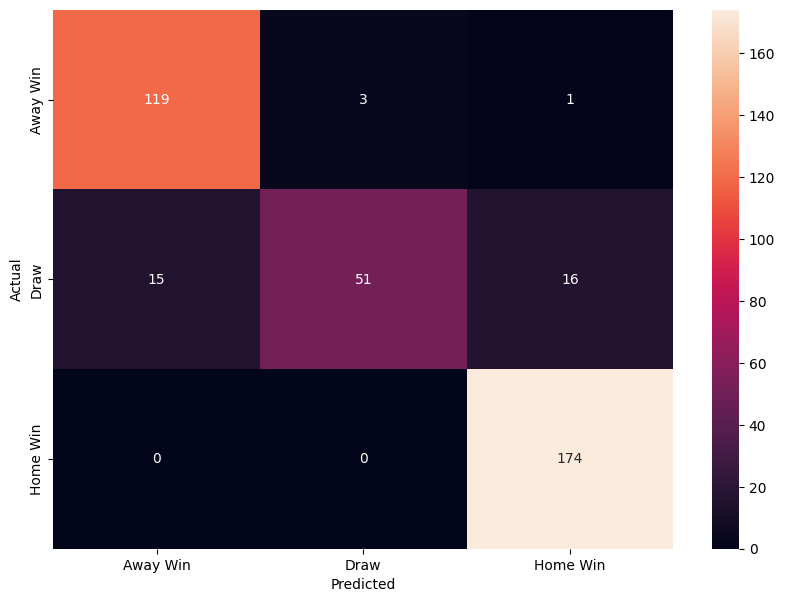

In [45]:
# confusion matrix

confusion_matrix(y_test, predictions)

# importing the packages for the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
plt.yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
plt.show()

In [46]:
# make some prediction for Wk 9 of the 2024/25 season

# Neural Nets

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [48]:
train_data = model_df[model_df['Season'] <= 2022]
test_data = model_df[model_df['Season'] == 2023]

X_train = train_data[features]
y_train = train_data[['Result', 'home_goals', 'away_goals']]

X_test = test_data[features]
y_test = test_data[['Result', 'home_goals', 'away_goals']]